# Time dependent Bayesian Optimization

In this example we demonstrate time dependent optimization. In this case we are not
only interested in finding an optimum point in input space, but also maintain the
ideal point over time.

In [1]:
# set values if testing
import os
import time
import warnings
import torch
from matplotlib import pyplot as plt
from tqdm import trange
from xopt.generators.bayesian import TDUpperConfidenceBoundGenerator
from xopt.vocs import VOCS
from xopt.evaluator import Evaluator
from xopt import Xopt

SMOKE_TEST = os.environ.get("SMOKE_TEST")
N_MC_SAMPLES = 1 if SMOKE_TEST else 128
NUM_RESTARTS = 1 if SMOKE_TEST else 20
N_STEPS = 1 if SMOKE_TEST else 250
warnings.filterwarnings("ignore")

## Time dependent test problem
Optimization is carried out over a single variable `x`. The test function is a simple
 quadratic, with a minimum location that drifts and changes as a function of time `t`.

Define test functions

In [2]:
# location of time dependent minimum
def k(t_):
    return torch.where(
        t_ < 50, 0.25 * torch.sin(t_ * 6 / 10.0) + 0.1e-2 * t_, -1.5e-2 * (t_ - 50.0)
    )


# define function in time and position space
def g(x_, t_):
    return (x_ - k(t_)) ** 2


# create callable function for Xopt
def f(inputs):
    x_ = inputs["x"]
    current_time = time.time()
    t_ = current_time - start_time
    y_ = g(x_, torch.tensor(t_))

    return {"y": float(y_), "time": float(current_time)}

## Define Xopt objects including optimization algorithm

In [3]:
variables = {"x": [-1, 1]}
objectives = {"y": "MINIMIZE"}

vocs = VOCS(variables=variables, objectives=objectives)

evaluator = Evaluator(function=f)

## Run optimization

In [4]:
generator = TDUpperConfidenceBoundGenerator(
    vocs=vocs,
    beta=0.01,
    added_time=0.1,
    forgetting_time=10.0,
)
generator.n_monte_carlo_samples = N_MC_SAMPLES
generator.numerical_optimizer.n_restarts = NUM_RESTARTS
generator.max_travel_distances = [0.1]

start_time = time.time()
X = Xopt(evaluator=evaluator, generator=generator, vocs=vocs)
X.random_evaluate(2)

for _ in trange(N_STEPS):
    # note that in this example we can ignore warnings if computation
    # time is greater than added time
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=RuntimeWarning)
        X.step()
        time.sleep(0.1)

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 1/250 [00:00<01:57,  2.12it/s]

  1%|          | 2/250 [00:00<01:26,  2.87it/s]

  1%|          | 3/250 [00:00<01:15,  3.28it/s]

  2%|▏         | 4/250 [00:01<01:20,  3.07it/s]

  2%|▏         | 5/250 [00:01<01:17,  3.18it/s]

  2%|▏         | 6/250 [00:01<01:17,  3.15it/s]

  3%|▎         | 7/250 [00:02<01:16,  3.20it/s]

  3%|▎         | 8/250 [00:02<01:10,  3.43it/s]

  4%|▎         | 9/250 [00:02<01:11,  3.39it/s]

  4%|▍         | 10/250 [00:03<01:09,  3.48it/s]

  4%|▍         | 11/250 [00:03<01:09,  3.42it/s]

  5%|▍         | 12/250 [00:03<01:11,  3.34it/s]

  5%|▌         | 13/250 [00:03<01:10,  3.36it/s]

  6%|▌         | 14/250 [00:04<01:08,  3.44it/s]

  6%|▌         | 15/250 [00:04<01:06,  3.54it/s]

  6%|▋         | 16/250 [00:04<01:03,  3.68it/s]

  7%|▋         | 17/250 [00:05<01:03,  3.65it/s]

  7%|▋         | 18/250 [00:05<01:03,  3.65it/s]

  8%|▊         | 19/250 [00:05<01:03,  3.61it/s]

  8%|▊         | 20/250 [00:05<01:04,  3.59it/s]

  8%|▊         | 21/250 [00:06<01:03,  3.59it/s]

  9%|▉         | 22/250 [00:06<01:05,  3.46it/s]

  9%|▉         | 23/250 [00:06<01:05,  3.48it/s]

 10%|▉         | 24/250 [00:07<01:09,  3.27it/s]

 10%|█         | 25/250 [00:07<01:10,  3.17it/s]

 10%|█         | 26/250 [00:07<01:09,  3.22it/s]

 11%|█         | 27/250 [00:08<01:10,  3.15it/s]

 11%|█         | 28/250 [00:08<01:10,  3.15it/s]

 12%|█▏        | 29/250 [00:08<01:08,  3.21it/s]

 12%|█▏        | 30/250 [00:09<01:09,  3.16it/s]

 12%|█▏        | 31/250 [00:09<01:08,  3.19it/s]

 13%|█▎        | 32/250 [00:09<01:08,  3.20it/s]

 13%|█▎        | 33/250 [00:09<01:06,  3.25it/s]

 14%|█▎        | 34/250 [00:10<01:04,  3.34it/s]

 14%|█▍        | 35/250 [00:10<01:09,  3.11it/s]

 14%|█▍        | 36/250 [00:10<01:12,  2.96it/s]

 15%|█▍        | 37/250 [00:11<01:09,  3.04it/s]

 15%|█▌        | 38/250 [00:11<01:07,  3.13it/s]

 16%|█▌        | 39/250 [00:11<01:11,  2.97it/s]

 16%|█▌        | 40/250 [00:12<01:08,  3.04it/s]

 16%|█▋        | 41/250 [00:12<01:10,  2.96it/s]

 17%|█▋        | 42/250 [00:12<01:10,  2.94it/s]

 17%|█▋        | 43/250 [00:13<01:07,  3.06it/s]

 18%|█▊        | 44/250 [00:13<01:12,  2.83it/s]

 18%|█▊        | 45/250 [00:14<01:13,  2.79it/s]

 18%|█▊        | 46/250 [00:14<01:10,  2.90it/s]

 19%|█▉        | 47/250 [00:14<01:09,  2.93it/s]

 19%|█▉        | 48/250 [00:15<01:11,  2.81it/s]

 20%|█▉        | 49/250 [00:15<01:11,  2.81it/s]

 20%|██        | 50/250 [00:15<01:14,  2.67it/s]

 20%|██        | 51/250 [00:16<01:12,  2.76it/s]

 21%|██        | 52/250 [00:16<01:12,  2.74it/s]

 21%|██        | 53/250 [00:16<01:06,  2.95it/s]

 22%|██▏       | 54/250 [00:17<01:06,  2.97it/s]

 22%|██▏       | 55/250 [00:17<01:03,  3.07it/s]

 22%|██▏       | 56/250 [00:17<01:03,  3.04it/s]

 23%|██▎       | 57/250 [00:18<01:07,  2.85it/s]

 23%|██▎       | 58/250 [00:18<01:12,  2.66it/s]

 24%|██▎       | 59/250 [00:19<01:14,  2.55it/s]

 24%|██▍       | 60/250 [00:19<01:18,  2.43it/s]

 24%|██▍       | 61/250 [00:19<01:12,  2.62it/s]

 25%|██▍       | 62/250 [00:20<01:08,  2.76it/s]

 25%|██▌       | 63/250 [00:20<01:04,  2.91it/s]

 26%|██▌       | 64/250 [00:20<01:01,  3.00it/s]

 26%|██▌       | 65/250 [00:21<01:00,  3.07it/s]

 26%|██▋       | 66/250 [00:21<00:57,  3.22it/s]

 27%|██▋       | 67/250 [00:21<00:55,  3.30it/s]

 27%|██▋       | 68/250 [00:21<00:56,  3.22it/s]

 28%|██▊       | 69/250 [00:22<00:54,  3.31it/s]

 28%|██▊       | 70/250 [00:22<00:53,  3.37it/s]

 28%|██▊       | 71/250 [00:22<00:51,  3.45it/s]

 29%|██▉       | 72/250 [00:23<00:55,  3.23it/s]

 29%|██▉       | 73/250 [00:23<00:52,  3.37it/s]

 30%|██▉       | 74/250 [00:23<00:50,  3.45it/s]

 30%|███       | 75/250 [00:23<00:49,  3.54it/s]

 30%|███       | 76/250 [00:24<00:48,  3.58it/s]

 31%|███       | 77/250 [00:24<00:48,  3.60it/s]

 31%|███       | 78/250 [00:24<00:46,  3.66it/s]

 32%|███▏      | 79/250 [00:25<00:46,  3.65it/s]

 32%|███▏      | 80/250 [00:25<00:49,  3.41it/s]

 32%|███▏      | 81/250 [00:25<00:49,  3.44it/s]

 33%|███▎      | 82/250 [00:25<00:48,  3.45it/s]

 33%|███▎      | 83/250 [00:26<00:48,  3.47it/s]

 34%|███▎      | 84/250 [00:26<00:46,  3.57it/s]

 34%|███▍      | 85/250 [00:26<00:44,  3.69it/s]

 34%|███▍      | 86/250 [00:27<00:48,  3.37it/s]

 35%|███▍      | 87/250 [00:27<00:50,  3.23it/s]

 35%|███▌      | 88/250 [00:27<00:51,  3.13it/s]

 36%|███▌      | 89/250 [00:28<00:53,  3.01it/s]

 36%|███▌      | 90/250 [00:28<00:51,  3.13it/s]

 36%|███▋      | 91/250 [00:28<00:48,  3.25it/s]

 37%|███▋      | 92/250 [00:28<00:45,  3.44it/s]

 37%|███▋      | 93/250 [00:29<00:45,  3.47it/s]

 38%|███▊      | 94/250 [00:29<00:48,  3.23it/s]

 38%|███▊      | 95/250 [00:29<00:46,  3.32it/s]

 38%|███▊      | 96/250 [00:30<00:45,  3.38it/s]

 39%|███▉      | 97/250 [00:30<00:43,  3.51it/s]

 39%|███▉      | 98/250 [00:30<00:44,  3.41it/s]

 40%|███▉      | 99/250 [00:31<00:46,  3.28it/s]

 40%|████      | 100/250 [00:31<00:47,  3.18it/s]

 40%|████      | 101/250 [00:31<00:44,  3.34it/s]

 41%|████      | 102/250 [00:31<00:42,  3.48it/s]

 41%|████      | 103/250 [00:32<00:49,  2.94it/s]

 42%|████▏     | 104/250 [00:32<00:48,  3.01it/s]

 42%|████▏     | 105/250 [00:33<00:46,  3.14it/s]

 42%|████▏     | 106/250 [00:33<00:45,  3.13it/s]

 43%|████▎     | 107/250 [00:33<00:49,  2.92it/s]

 43%|████▎     | 108/250 [00:34<00:49,  2.87it/s]

 44%|████▎     | 109/250 [00:34<00:49,  2.82it/s]

 44%|████▍     | 110/250 [00:34<00:47,  2.95it/s]

 44%|████▍     | 111/250 [00:35<00:45,  3.04it/s]

 45%|████▍     | 112/250 [00:35<00:43,  3.16it/s]

 45%|████▌     | 113/250 [00:35<00:41,  3.29it/s]

 46%|████▌     | 114/250 [00:35<00:40,  3.39it/s]

 46%|████▌     | 115/250 [00:36<00:39,  3.45it/s]

 46%|████▋     | 116/250 [00:36<00:39,  3.42it/s]

 47%|████▋     | 117/250 [00:36<00:38,  3.44it/s]

 47%|████▋     | 118/250 [00:37<00:37,  3.51it/s]

 48%|████▊     | 119/250 [00:37<00:37,  3.50it/s]

 48%|████▊     | 120/250 [00:37<00:36,  3.54it/s]

 48%|████▊     | 121/250 [00:38<00:41,  3.10it/s]

 49%|████▉     | 122/250 [00:38<00:40,  3.17it/s]

 49%|████▉     | 123/250 [00:38<00:38,  3.28it/s]

 50%|████▉     | 124/250 [00:38<00:38,  3.29it/s]

 50%|█████     | 125/250 [00:39<00:37,  3.32it/s]

 50%|█████     | 126/250 [00:39<00:39,  3.17it/s]

 51%|█████     | 127/250 [00:39<00:38,  3.18it/s]

 51%|█████     | 128/250 [00:40<00:40,  3.01it/s]

 52%|█████▏    | 129/250 [00:40<00:39,  3.03it/s]

 52%|█████▏    | 130/250 [00:40<00:39,  3.02it/s]

 52%|█████▏    | 131/250 [00:41<00:38,  3.08it/s]

 53%|█████▎    | 132/250 [00:41<00:37,  3.11it/s]

 53%|█████▎    | 133/250 [00:41<00:40,  2.85it/s]

 54%|█████▎    | 134/250 [00:42<00:39,  2.94it/s]

 54%|█████▍    | 135/250 [00:42<00:37,  3.04it/s]

 54%|█████▍    | 136/250 [00:42<00:36,  3.12it/s]

 55%|█████▍    | 137/250 [00:43<00:37,  2.98it/s]

 55%|█████▌    | 138/250 [00:43<00:36,  3.07it/s]

 56%|█████▌    | 139/250 [00:43<00:38,  2.88it/s]

 56%|█████▌    | 140/250 [00:44<00:38,  2.86it/s]

 56%|█████▋    | 141/250 [00:44<00:36,  2.97it/s]

 57%|█████▋    | 142/250 [00:44<00:37,  2.89it/s]

 57%|█████▋    | 143/250 [00:45<00:39,  2.72it/s]

 58%|█████▊    | 144/250 [00:45<00:38,  2.74it/s]

 58%|█████▊    | 145/250 [00:46<00:37,  2.81it/s]

 58%|█████▊    | 146/250 [00:46<00:38,  2.69it/s]

 59%|█████▉    | 147/250 [00:46<00:37,  2.78it/s]

 59%|█████▉    | 148/250 [00:47<00:35,  2.87it/s]

 60%|█████▉    | 149/250 [00:47<00:35,  2.84it/s]

 60%|██████    | 150/250 [00:47<00:35,  2.82it/s]

 60%|██████    | 151/250 [00:48<00:34,  2.84it/s]

 61%|██████    | 152/250 [00:48<00:38,  2.56it/s]

 61%|██████    | 153/250 [00:49<00:40,  2.40it/s]

 62%|██████▏   | 154/250 [00:49<00:37,  2.56it/s]

 62%|██████▏   | 155/250 [00:49<00:33,  2.86it/s]

 62%|██████▏   | 156/250 [00:50<00:34,  2.76it/s]

 63%|██████▎   | 157/250 [00:50<00:33,  2.81it/s]

 63%|██████▎   | 158/250 [00:50<00:29,  3.12it/s]

 64%|██████▎   | 159/250 [00:51<00:29,  3.05it/s]

 64%|██████▍   | 160/250 [00:51<00:29,  3.03it/s]

 64%|██████▍   | 161/250 [00:51<00:29,  3.00it/s]

 65%|██████▍   | 162/250 [00:51<00:26,  3.27it/s]

 65%|██████▌   | 163/250 [00:52<00:25,  3.40it/s]

 66%|██████▌   | 164/250 [00:52<00:25,  3.40it/s]

 66%|██████▌   | 165/250 [00:52<00:25,  3.28it/s]

 66%|██████▋   | 166/250 [00:53<00:25,  3.31it/s]

 67%|██████▋   | 167/250 [00:53<00:24,  3.43it/s]

 67%|██████▋   | 168/250 [00:53<00:22,  3.57it/s]

 68%|██████▊   | 169/250 [00:54<00:23,  3.41it/s]

 68%|██████▊   | 170/250 [00:54<00:23,  3.48it/s]

 68%|██████▊   | 171/250 [00:54<00:23,  3.33it/s]

 69%|██████▉   | 172/250 [00:54<00:23,  3.30it/s]

 69%|██████▉   | 173/250 [00:55<00:23,  3.28it/s]

 70%|██████▉   | 174/250 [00:55<00:23,  3.30it/s]

 70%|███████   | 175/250 [00:55<00:22,  3.29it/s]

 70%|███████   | 176/250 [00:56<00:22,  3.25it/s]

 71%|███████   | 177/250 [00:56<00:22,  3.27it/s]

 71%|███████   | 178/250 [00:56<00:21,  3.28it/s]

 72%|███████▏  | 179/250 [00:57<00:21,  3.28it/s]

 72%|███████▏  | 180/250 [00:57<00:21,  3.29it/s]

 72%|███████▏  | 181/250 [00:57<00:21,  3.25it/s]

 73%|███████▎  | 182/250 [00:57<00:20,  3.27it/s]

 73%|███████▎  | 183/250 [00:58<00:20,  3.23it/s]

 74%|███████▎  | 184/250 [00:58<00:20,  3.19it/s]

 74%|███████▍  | 185/250 [00:58<00:20,  3.15it/s]

 74%|███████▍  | 186/250 [00:59<00:20,  3.15it/s]

 75%|███████▍  | 187/250 [00:59<00:21,  2.92it/s]

 75%|███████▌  | 188/250 [00:59<00:20,  3.01it/s]

 76%|███████▌  | 189/250 [01:00<00:20,  2.98it/s]

 76%|███████▌  | 190/250 [01:00<00:20,  2.93it/s]

 76%|███████▋  | 191/250 [01:01<00:20,  2.85it/s]

 77%|███████▋  | 192/250 [01:01<00:21,  2.75it/s]

 77%|███████▋  | 193/250 [01:01<00:21,  2.65it/s]

 78%|███████▊  | 194/250 [01:02<00:20,  2.68it/s]

 78%|███████▊  | 195/250 [01:02<00:20,  2.70it/s]

 78%|███████▊  | 196/250 [01:02<00:19,  2.70it/s]

 79%|███████▉  | 197/250 [01:03<00:20,  2.61it/s]

 79%|███████▉  | 198/250 [01:03<00:18,  2.78it/s]

 80%|███████▉  | 199/250 [01:03<00:17,  2.95it/s]

 80%|████████  | 200/250 [01:04<00:16,  3.04it/s]

 80%|████████  | 201/250 [01:04<00:15,  3.15it/s]

 81%|████████  | 202/250 [01:04<00:15,  3.19it/s]

 81%|████████  | 203/250 [01:05<00:14,  3.27it/s]

 82%|████████▏ | 204/250 [01:05<00:13,  3.32it/s]

 82%|████████▏ | 205/250 [01:05<00:13,  3.30it/s]

 82%|████████▏ | 206/250 [01:06<00:13,  3.37it/s]

 83%|████████▎ | 207/250 [01:06<00:12,  3.39it/s]

 83%|████████▎ | 208/250 [01:06<00:12,  3.43it/s]

 84%|████████▎ | 209/250 [01:06<00:11,  3.53it/s]

 84%|████████▍ | 210/250 [01:07<00:11,  3.53it/s]

 84%|████████▍ | 211/250 [01:07<00:11,  3.52it/s]

 85%|████████▍ | 212/250 [01:07<00:10,  3.56it/s]

 85%|████████▌ | 213/250 [01:08<00:10,  3.52it/s]

 86%|████████▌ | 214/250 [01:08<00:10,  3.53it/s]

 86%|████████▌ | 215/250 [01:08<00:09,  3.51it/s]

 86%|████████▋ | 216/250 [01:08<00:09,  3.55it/s]

 87%|████████▋ | 217/250 [01:09<00:09,  3.63it/s]

 87%|████████▋ | 218/250 [01:09<00:08,  3.64it/s]

 88%|████████▊ | 219/250 [01:09<00:09,  3.42it/s]

 88%|████████▊ | 220/250 [01:10<00:09,  3.31it/s]

 88%|████████▊ | 221/250 [01:10<00:08,  3.28it/s]

 89%|████████▉ | 222/250 [01:10<00:08,  3.20it/s]

 89%|████████▉ | 223/250 [01:10<00:08,  3.19it/s]

 90%|████████▉ | 224/250 [01:11<00:08,  3.15it/s]

 90%|█████████ | 225/250 [01:11<00:07,  3.14it/s]

 90%|█████████ | 226/250 [01:11<00:07,  3.19it/s]

 91%|█████████ | 227/250 [01:12<00:07,  3.18it/s]

 91%|█████████ | 228/250 [01:12<00:06,  3.17it/s]

 92%|█████████▏| 229/250 [01:12<00:06,  3.15it/s]

 92%|█████████▏| 230/250 [01:13<00:06,  3.19it/s]

 92%|█████████▏| 231/250 [01:13<00:06,  3.11it/s]

 93%|█████████▎| 232/250 [01:13<00:06,  2.91it/s]

 93%|█████████▎| 233/250 [01:14<00:05,  2.98it/s]

 94%|█████████▎| 234/250 [01:14<00:05,  3.00it/s]

 94%|█████████▍| 235/250 [01:14<00:04,  3.02it/s]

 94%|█████████▍| 236/250 [01:15<00:04,  3.06it/s]

 95%|█████████▍| 237/250 [01:15<00:04,  3.08it/s]

 95%|█████████▌| 238/250 [01:15<00:03,  3.11it/s]

 96%|█████████▌| 239/250 [01:16<00:03,  3.15it/s]

 96%|█████████▌| 240/250 [01:16<00:03,  3.21it/s]

 96%|█████████▋| 241/250 [01:16<00:02,  3.24it/s]

 97%|█████████▋| 242/250 [01:17<00:02,  3.11it/s]

 97%|█████████▋| 243/250 [01:17<00:02,  3.08it/s]

 98%|█████████▊| 244/250 [01:17<00:01,  3.14it/s]

 98%|█████████▊| 245/250 [01:18<00:01,  3.16it/s]

 98%|█████████▊| 246/250 [01:18<00:01,  3.12it/s]

 99%|█████████▉| 247/250 [01:18<00:00,  3.01it/s]

 99%|█████████▉| 248/250 [01:19<00:00,  3.06it/s]

100%|█████████▉| 249/250 [01:19<00:00,  2.97it/s]

100%|██████████| 250/250 [01:19<00:00,  3.01it/s]

100%|██████████| 250/250 [01:19<00:00,  3.13it/s]

## Visualize GP model of objective function and plot trajectory

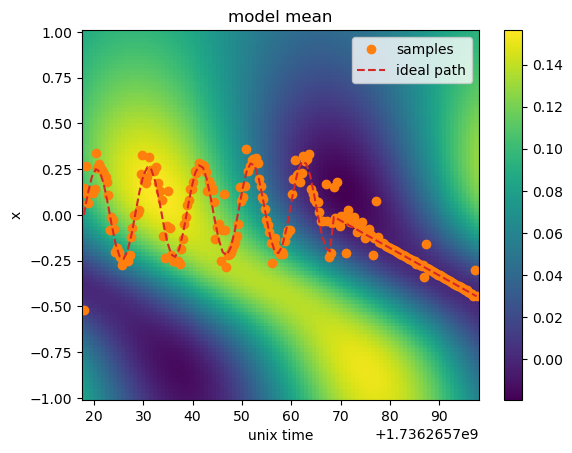

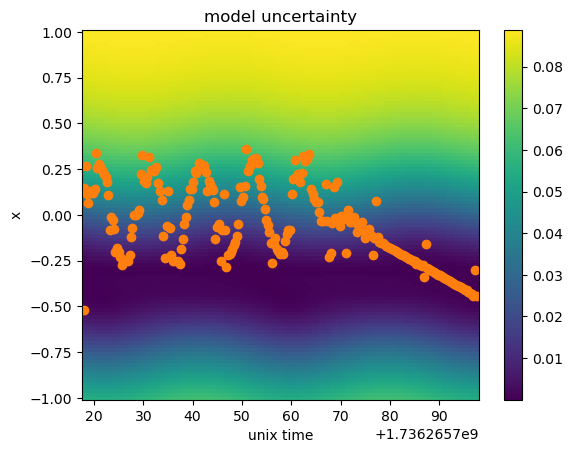

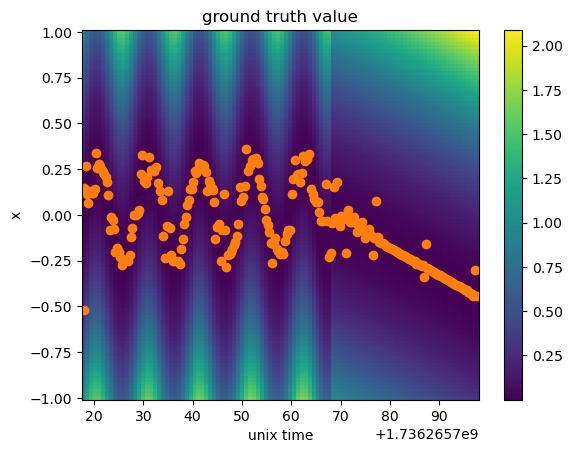

In [5]:
data = X.data

xbounds = generator.vocs.bounds
tbounds = [data["time"].min(), data["time"].max()]

model = X.generator.model
n = 100
t = torch.linspace(*tbounds, n, dtype=torch.double)
x = torch.linspace(*xbounds.flatten(), n, dtype=torch.double)
tt, xx = torch.meshgrid(t, x)
pts = torch.hstack([ele.reshape(-1, 1) for ele in (tt, xx)]).double()

tt, xx = tt.numpy(), xx.numpy()

# NOTE: the model inputs are such that t is the last dimension
gp_pts = torch.flip(pts, dims=[-1])

gt_vals = g(gp_pts.T[0], gp_pts.T[1] - start_time)

with torch.no_grad():
    post = model.posterior(gp_pts)

    mean = post.mean
    std = torch.sqrt(post.variance)

    fig, ax = plt.subplots()
    ax.set_title("model mean")
    ax.set_xlabel("unix time")
    ax.set_ylabel("x")
    c = ax.pcolor(tt, xx, mean.reshape(n, n), rasterized=True)
    ax.plot(data["time"].to_numpy(), data["x"].to_numpy(), "oC1", label="samples")

    ax.plot(t, k(t - start_time), "C3--", label="ideal path", zorder=10)
    ax.legend()
    fig.colorbar(c)

    fig2, ax2 = plt.subplots()
    ax2.set_title("model uncertainty")
    ax2.set_xlabel("unix time")
    ax2.set_ylabel("x")
    c = ax2.pcolor(tt, xx, std.reshape(n, n))
    fig2.colorbar(c)

    fig3, ax3 = plt.subplots()
    ax3.set_title("ground truth value")
    ax3.set_xlabel("unix time")
    ax3.set_ylabel("x")
    c = ax3.pcolor(tt, xx, gt_vals.reshape(n, n))
    fig3.colorbar(c)

    ax2.plot(data["time"].to_numpy(), data["x"].to_numpy(), "oC1")
    ax3.plot(data["time"].to_numpy(), data["x"].to_numpy(), "oC1")

## plot the acquisition function

79.54119777679443


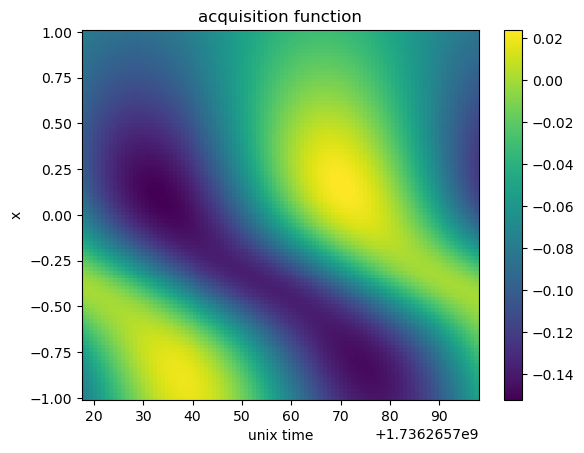

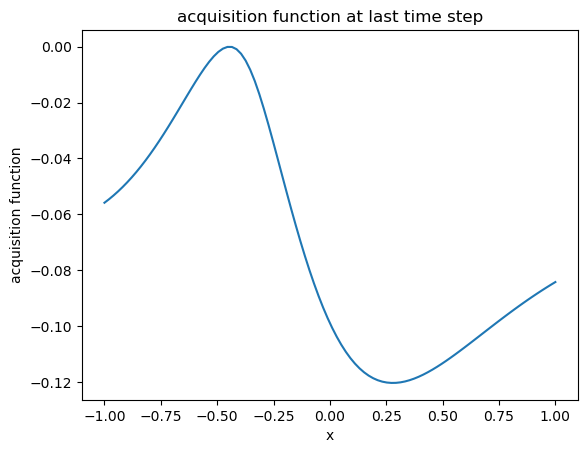

In [6]:
# note that target time is only updated during the generate call
target_time = X.generator.target_prediction_time
print(target_time - start_time)
my_acq_func = X.generator.get_acquisition(model)

with torch.no_grad():
    acq_pts = x.unsqueeze(-1).unsqueeze(-1)
    full_acq = my_acq_func.acq_func(gp_pts.unsqueeze(1))
    fixed_acq = my_acq_func(acq_pts)

    fig, ax = plt.subplots()
    c = ax.pcolor(tt, xx, full_acq.reshape(n, n))
    ax.set_xlabel("unix time")
    ax.set_ylabel("x")
    ax.set_title("acquisition function")
    fig.colorbar(c)

    fi2, ax2 = plt.subplots()
    ax2.plot(x.flatten(), fixed_acq.flatten())
    ax2.set_xlabel("x")
    ax2.set_ylabel("acquisition function")
    ax2.set_title("acquisition function at last time step")

## Run Time Dependent BO with Model Caching
Instead of retraining the GP model hyperparameters at every step, we can instead hold
on to previously determined model parameters by setting
`use_catched_hyperparameters=True` in the model constructor. This reduces the time
needed to make decisions, leading to faster feedback when addressing time-critical
optimization tasks. However,  this can come at the cost of model accuracy when the
target function changes behavior (change in lengthscale for example).

In [7]:
generator = TDUpperConfidenceBoundGenerator(
    vocs=vocs,
    beta=0.01,
    added_time=0.1,
    forgetting_time=20.0,
)
generator.n_monte_carlo_samples = N_MC_SAMPLES
generator.numerical_optimizer.n_restarts = NUM_RESTARTS
generator.max_travel_distances = [0.1]

start_time = time.time()

X = Xopt(evaluator=evaluator, generator=generator, vocs=vocs)
X.random_evaluate(2)

for i in trange(N_STEPS):
    # note that in this example we can ignore warnings if computation time is greater
    # than added time
    if i == 50:
        X.generator.gp_constructor.use_cached_hyperparameters = True

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=RuntimeWarning)
        X.step()
        time.sleep(0.1)

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 1/250 [00:00<01:02,  4.00it/s]

  1%|          | 2/250 [00:00<01:10,  3.54it/s]

  1%|          | 3/250 [00:00<01:16,  3.23it/s]

  2%|▏         | 4/250 [00:01<01:12,  3.38it/s]

  2%|▏         | 5/250 [00:01<01:13,  3.33it/s]

  2%|▏         | 6/250 [00:01<01:17,  3.14it/s]

  3%|▎         | 7/250 [00:02<01:15,  3.21it/s]

  3%|▎         | 8/250 [00:02<01:12,  3.32it/s]

  4%|▎         | 9/250 [00:02<01:11,  3.36it/s]

  4%|▍         | 10/250 [00:03<01:13,  3.27it/s]

  4%|▍         | 11/250 [00:03<01:16,  3.14it/s]

  5%|▍         | 12/250 [00:03<01:18,  3.05it/s]

  5%|▌         | 13/250 [00:04<01:18,  3.01it/s]

  6%|▌         | 14/250 [00:04<01:16,  3.10it/s]

  6%|▌         | 15/250 [00:04<01:16,  3.06it/s]

  6%|▋         | 16/250 [00:05<01:15,  3.11it/s]

  7%|▋         | 17/250 [00:05<01:15,  3.07it/s]

  7%|▋         | 18/250 [00:05<01:17,  3.01it/s]

  8%|▊         | 19/250 [00:05<01:12,  3.17it/s]

  8%|▊         | 20/250 [00:06<01:10,  3.27it/s]

  8%|▊         | 21/250 [00:06<01:11,  3.20it/s]

  9%|▉         | 22/250 [00:07<01:24,  2.69it/s]

  9%|▉         | 23/250 [00:07<01:22,  2.77it/s]

 10%|▉         | 24/250 [00:07<01:22,  2.73it/s]

 10%|█         | 25/250 [00:08<01:21,  2.78it/s]

 10%|█         | 26/250 [00:08<01:15,  2.95it/s]

 11%|█         | 27/250 [00:08<01:12,  3.06it/s]

 11%|█         | 28/250 [00:09<01:11,  3.12it/s]

 12%|█▏        | 29/250 [00:09<01:10,  3.13it/s]

 12%|█▏        | 30/250 [00:09<01:12,  3.03it/s]

 12%|█▏        | 31/250 [00:10<01:11,  3.07it/s]

 13%|█▎        | 32/250 [00:10<01:10,  3.07it/s]

 13%|█▎        | 33/250 [00:10<01:11,  3.05it/s]

 14%|█▎        | 34/250 [00:11<01:12,  2.98it/s]

 14%|█▍        | 35/250 [00:11<01:10,  3.05it/s]

 14%|█▍        | 36/250 [00:11<01:10,  3.02it/s]

 15%|█▍        | 37/250 [00:12<01:10,  3.04it/s]

 15%|█▌        | 38/250 [00:12<01:09,  3.07it/s]

 16%|█▌        | 39/250 [00:12<01:08,  3.08it/s]

 16%|█▌        | 40/250 [00:12<01:08,  3.05it/s]

 16%|█▋        | 41/250 [00:13<01:07,  3.08it/s]

 17%|█▋        | 42/250 [00:13<01:08,  3.04it/s]

 17%|█▋        | 43/250 [00:13<01:08,  3.04it/s]

 18%|█▊        | 44/250 [00:14<01:08,  2.99it/s]

 18%|█▊        | 45/250 [00:14<01:09,  2.94it/s]

 18%|█▊        | 46/250 [00:15<01:09,  2.95it/s]

 19%|█▉        | 47/250 [00:15<01:08,  2.96it/s]

 19%|█▉        | 48/250 [00:15<01:08,  2.94it/s]

 20%|█▉        | 49/250 [00:16<01:06,  3.00it/s]

 20%|██        | 50/250 [00:16<01:07,  2.97it/s]

 20%|██        | 51/250 [00:16<00:59,  3.37it/s]

 21%|██        | 52/250 [00:16<00:53,  3.72it/s]

 21%|██        | 53/250 [00:16<00:49,  4.02it/s]

 22%|██▏       | 54/250 [00:17<00:46,  4.25it/s]

 22%|██▏       | 55/250 [00:17<00:43,  4.43it/s]

 22%|██▏       | 56/250 [00:17<00:42,  4.57it/s]

 23%|██▎       | 57/250 [00:17<00:41,  4.67it/s]

 23%|██▎       | 58/250 [00:17<00:40,  4.74it/s]

 24%|██▎       | 59/250 [00:18<00:39,  4.79it/s]

 24%|██▍       | 60/250 [00:18<00:39,  4.82it/s]

 24%|██▍       | 61/250 [00:18<00:38,  4.85it/s]

 25%|██▍       | 62/250 [00:18<00:38,  4.86it/s]

 25%|██▌       | 63/250 [00:19<00:38,  4.88it/s]

 26%|██▌       | 64/250 [00:19<00:38,  4.88it/s]

 26%|██▌       | 65/250 [00:19<00:37,  4.90it/s]

 26%|██▋       | 66/250 [00:19<00:37,  4.90it/s]

 27%|██▋       | 67/250 [00:19<00:37,  4.90it/s]

 27%|██▋       | 68/250 [00:20<00:37,  4.90it/s]

 28%|██▊       | 69/250 [00:20<00:36,  4.91it/s]

 28%|██▊       | 70/250 [00:20<00:36,  4.91it/s]

 28%|██▊       | 71/250 [00:20<00:36,  4.91it/s]

 29%|██▉       | 72/250 [00:20<00:36,  4.92it/s]

 29%|██▉       | 73/250 [00:21<00:36,  4.91it/s]

 30%|██▉       | 74/250 [00:21<00:35,  4.91it/s]

 30%|███       | 75/250 [00:21<00:35,  4.92it/s]

 30%|███       | 76/250 [00:21<00:35,  4.92it/s]

 31%|███       | 77/250 [00:21<00:35,  4.91it/s]

 31%|███       | 78/250 [00:22<00:35,  4.91it/s]

 32%|███▏      | 79/250 [00:22<00:34,  4.92it/s]

 32%|███▏      | 80/250 [00:22<00:34,  4.91it/s]

 32%|███▏      | 81/250 [00:22<00:34,  4.92it/s]

 33%|███▎      | 82/250 [00:22<00:34,  4.91it/s]

 33%|███▎      | 83/250 [00:23<00:33,  4.91it/s]

 34%|███▎      | 84/250 [00:23<00:33,  4.91it/s]

 34%|███▍      | 85/250 [00:23<00:33,  4.91it/s]

 34%|███▍      | 86/250 [00:23<00:33,  4.91it/s]

 35%|███▍      | 87/250 [00:23<00:33,  4.91it/s]

 35%|███▌      | 88/250 [00:24<00:32,  4.91it/s]

 36%|███▌      | 89/250 [00:24<00:32,  4.91it/s]

 36%|███▌      | 90/250 [00:24<00:32,  4.91it/s]

 36%|███▋      | 91/250 [00:24<00:32,  4.91it/s]

 37%|███▋      | 92/250 [00:24<00:32,  4.91it/s]

 37%|███▋      | 93/250 [00:25<00:31,  4.91it/s]

 38%|███▊      | 94/250 [00:25<00:31,  4.91it/s]

 38%|███▊      | 95/250 [00:25<00:31,  4.92it/s]

 38%|███▊      | 96/250 [00:25<00:31,  4.91it/s]

 39%|███▉      | 97/250 [00:25<00:31,  4.91it/s]

 39%|███▉      | 98/250 [00:26<00:30,  4.91it/s]

 40%|███▉      | 99/250 [00:26<00:30,  4.91it/s]

 40%|████      | 100/250 [00:26<00:30,  4.91it/s]

 40%|████      | 101/250 [00:26<00:30,  4.92it/s]

 41%|████      | 102/250 [00:26<00:30,  4.92it/s]

 41%|████      | 103/250 [00:27<00:29,  4.91it/s]

 42%|████▏     | 104/250 [00:27<00:29,  4.92it/s]

 42%|████▏     | 105/250 [00:27<00:29,  4.92it/s]

 42%|████▏     | 106/250 [00:27<00:29,  4.92it/s]

 43%|████▎     | 107/250 [00:27<00:29,  4.92it/s]

 43%|████▎     | 108/250 [00:28<00:28,  4.92it/s]

 44%|████▎     | 109/250 [00:28<00:28,  4.92it/s]

 44%|████▍     | 110/250 [00:28<00:28,  4.92it/s]

 44%|████▍     | 111/250 [00:28<00:28,  4.92it/s]

 45%|████▍     | 112/250 [00:28<00:28,  4.92it/s]

 45%|████▌     | 113/250 [00:29<00:27,  4.92it/s]

 46%|████▌     | 114/250 [00:29<00:27,  4.92it/s]

 46%|████▌     | 115/250 [00:29<00:27,  4.91it/s]

 46%|████▋     | 116/250 [00:29<00:27,  4.92it/s]

 47%|████▋     | 117/250 [00:29<00:27,  4.92it/s]

 47%|████▋     | 118/250 [00:30<00:26,  4.91it/s]

 48%|████▊     | 119/250 [00:30<00:26,  4.91it/s]

 48%|████▊     | 120/250 [00:30<00:26,  4.91it/s]

 48%|████▊     | 121/250 [00:30<00:26,  4.91it/s]

 49%|████▉     | 122/250 [00:31<00:26,  4.92it/s]

 49%|████▉     | 123/250 [00:31<00:25,  4.92it/s]

 50%|████▉     | 124/250 [00:31<00:25,  4.92it/s]

 50%|█████     | 125/250 [00:31<00:25,  4.92it/s]

 50%|█████     | 126/250 [00:31<00:25,  4.92it/s]

 51%|█████     | 127/250 [00:32<00:25,  4.92it/s]

 51%|█████     | 128/250 [00:32<00:24,  4.91it/s]

 52%|█████▏    | 129/250 [00:32<00:24,  4.91it/s]

 52%|█████▏    | 130/250 [00:32<00:24,  4.91it/s]

 52%|█████▏    | 131/250 [00:32<00:24,  4.91it/s]

 53%|█████▎    | 132/250 [00:33<00:24,  4.91it/s]

 53%|█████▎    | 133/250 [00:33<00:23,  4.91it/s]

 54%|█████▎    | 134/250 [00:33<00:23,  4.92it/s]

 54%|█████▍    | 135/250 [00:33<00:23,  4.92it/s]

 54%|█████▍    | 136/250 [00:33<00:23,  4.92it/s]

 55%|█████▍    | 137/250 [00:34<00:22,  4.92it/s]

 55%|█████▌    | 138/250 [00:34<00:22,  4.92it/s]

 56%|█████▌    | 139/250 [00:34<00:22,  4.92it/s]

 56%|█████▌    | 140/250 [00:34<00:22,  4.92it/s]

 56%|█████▋    | 141/250 [00:34<00:22,  4.92it/s]

 57%|█████▋    | 142/250 [00:35<00:21,  4.92it/s]

 57%|█████▋    | 143/250 [00:35<00:21,  4.92it/s]

 58%|█████▊    | 144/250 [00:35<00:23,  4.44it/s]

 58%|█████▊    | 145/250 [00:35<00:22,  4.57it/s]

 58%|█████▊    | 146/250 [00:35<00:22,  4.67it/s]

 59%|█████▉    | 147/250 [00:36<00:21,  4.74it/s]

 59%|█████▉    | 148/250 [00:36<00:21,  4.80it/s]

 60%|█████▉    | 149/250 [00:36<00:20,  4.83it/s]

 60%|██████    | 150/250 [00:36<00:20,  4.86it/s]

 60%|██████    | 151/250 [00:36<00:20,  4.88it/s]

 61%|██████    | 152/250 [00:37<00:20,  4.89it/s]

 61%|██████    | 153/250 [00:37<00:19,  4.90it/s]

 62%|██████▏   | 154/250 [00:37<00:19,  4.91it/s]

 62%|██████▏   | 155/250 [00:37<00:19,  4.92it/s]

 62%|██████▏   | 156/250 [00:37<00:19,  4.92it/s]

 63%|██████▎   | 157/250 [00:38<00:18,  4.93it/s]

 63%|██████▎   | 158/250 [00:38<00:18,  4.93it/s]

 64%|██████▎   | 159/250 [00:38<00:18,  4.92it/s]

 64%|██████▍   | 160/250 [00:38<00:18,  4.93it/s]

 64%|██████▍   | 161/250 [00:39<00:18,  4.92it/s]

 65%|██████▍   | 162/250 [00:39<00:17,  4.92it/s]

 65%|██████▌   | 163/250 [00:39<00:17,  4.92it/s]

 66%|██████▌   | 164/250 [00:39<00:17,  4.92it/s]

 66%|██████▌   | 165/250 [00:39<00:17,  4.92it/s]

 66%|██████▋   | 166/250 [00:40<00:17,  4.93it/s]

 67%|██████▋   | 167/250 [00:40<00:16,  4.92it/s]

 67%|██████▋   | 168/250 [00:40<00:16,  4.92it/s]

 68%|██████▊   | 169/250 [00:40<00:16,  4.92it/s]

 68%|██████▊   | 170/250 [00:40<00:16,  4.92it/s]

 68%|██████▊   | 171/250 [00:41<00:16,  4.92it/s]

 69%|██████▉   | 172/250 [00:41<00:15,  4.92it/s]

 69%|██████▉   | 173/250 [00:41<00:15,  4.93it/s]

 70%|██████▉   | 174/250 [00:41<00:15,  4.93it/s]

 70%|███████   | 175/250 [00:41<00:15,  4.93it/s]

 70%|███████   | 176/250 [00:42<00:15,  4.93it/s]

 71%|███████   | 177/250 [00:42<00:14,  4.93it/s]

 71%|███████   | 178/250 [00:42<00:14,  4.93it/s]

 72%|███████▏  | 179/250 [00:42<00:14,  4.93it/s]

 72%|███████▏  | 180/250 [00:42<00:14,  4.93it/s]

 72%|███████▏  | 181/250 [00:43<00:13,  4.93it/s]

 73%|███████▎  | 182/250 [00:43<00:13,  4.93it/s]

 73%|███████▎  | 183/250 [00:43<00:13,  4.93it/s]

 74%|███████▎  | 184/250 [00:43<00:13,  4.92it/s]

 74%|███████▍  | 185/250 [00:43<00:13,  4.93it/s]

 74%|███████▍  | 186/250 [00:44<00:12,  4.93it/s]

 75%|███████▍  | 187/250 [00:44<00:12,  4.93it/s]

 75%|███████▌  | 188/250 [00:44<00:12,  4.92it/s]

 76%|███████▌  | 189/250 [00:44<00:12,  4.92it/s]

 76%|███████▌  | 190/250 [00:44<00:12,  4.92it/s]

 76%|███████▋  | 191/250 [00:45<00:11,  4.93it/s]

 77%|███████▋  | 192/250 [00:45<00:11,  4.93it/s]

 77%|███████▋  | 193/250 [00:45<00:11,  4.93it/s]

 78%|███████▊  | 194/250 [00:45<00:11,  4.93it/s]

 78%|███████▊  | 195/250 [00:45<00:11,  4.93it/s]

 78%|███████▊  | 196/250 [00:46<00:10,  4.92it/s]

 79%|███████▉  | 197/250 [00:46<00:10,  4.92it/s]

 79%|███████▉  | 198/250 [00:46<00:10,  4.92it/s]

 80%|███████▉  | 199/250 [00:46<00:10,  4.92it/s]

 80%|████████  | 200/250 [00:46<00:10,  4.93it/s]

 80%|████████  | 201/250 [00:47<00:09,  4.93it/s]

 81%|████████  | 202/250 [00:47<00:09,  4.93it/s]

 81%|████████  | 203/250 [00:47<00:09,  4.93it/s]

 82%|████████▏ | 204/250 [00:47<00:09,  4.92it/s]

 82%|████████▏ | 205/250 [00:47<00:09,  4.92it/s]

 82%|████████▏ | 206/250 [00:48<00:08,  4.92it/s]

 83%|████████▎ | 207/250 [00:48<00:08,  4.79it/s]

 83%|████████▎ | 208/250 [00:48<00:08,  4.83it/s]

 84%|████████▎ | 209/250 [00:48<00:08,  4.86it/s]

 84%|████████▍ | 210/250 [00:48<00:08,  4.88it/s]

 84%|████████▍ | 211/250 [00:49<00:07,  4.90it/s]

 85%|████████▍ | 212/250 [00:49<00:07,  4.91it/s]

 85%|████████▌ | 213/250 [00:49<00:07,  4.91it/s]

 86%|████████▌ | 214/250 [00:49<00:07,  4.91it/s]

 86%|████████▌ | 215/250 [00:49<00:07,  4.92it/s]

 86%|████████▋ | 216/250 [00:50<00:06,  4.93it/s]

 87%|████████▋ | 217/250 [00:50<00:06,  4.92it/s]

 87%|████████▋ | 218/250 [00:50<00:06,  4.92it/s]

 88%|████████▊ | 219/250 [00:50<00:06,  4.92it/s]

 88%|████████▊ | 220/250 [00:51<00:06,  4.92it/s]

 88%|████████▊ | 221/250 [00:51<00:05,  4.91it/s]

 89%|████████▉ | 222/250 [00:51<00:05,  4.88it/s]

 89%|████████▉ | 223/250 [00:51<00:05,  4.89it/s]

 90%|████████▉ | 224/250 [00:51<00:05,  4.89it/s]

 90%|█████████ | 225/250 [00:52<00:05,  4.90it/s]

 90%|█████████ | 226/250 [00:52<00:04,  4.91it/s]

 91%|█████████ | 227/250 [00:52<00:04,  4.91it/s]

 91%|█████████ | 228/250 [00:52<00:04,  4.91it/s]

 92%|█████████▏| 229/250 [00:52<00:04,  4.91it/s]

 92%|█████████▏| 230/250 [00:53<00:04,  4.91it/s]

 92%|█████████▏| 231/250 [00:53<00:03,  4.91it/s]

 93%|█████████▎| 232/250 [00:53<00:03,  4.91it/s]

 93%|█████████▎| 233/250 [00:53<00:03,  4.92it/s]

 94%|█████████▎| 234/250 [00:53<00:03,  4.92it/s]

 94%|█████████▍| 235/250 [00:54<00:03,  4.92it/s]

 94%|█████████▍| 236/250 [00:54<00:03,  4.42it/s]

 95%|█████████▍| 237/250 [00:54<00:02,  4.56it/s]

 95%|█████████▌| 238/250 [00:54<00:02,  4.66it/s]

 96%|█████████▌| 239/250 [00:54<00:02,  4.73it/s]

 96%|█████████▌| 240/250 [00:55<00:02,  4.79it/s]

 96%|█████████▋| 241/250 [00:55<00:01,  4.83it/s]

 97%|█████████▋| 242/250 [00:55<00:01,  4.86it/s]

 97%|█████████▋| 243/250 [00:55<00:01,  4.87it/s]

 98%|█████████▊| 244/250 [00:55<00:01,  4.89it/s]

 98%|█████████▊| 245/250 [00:56<00:01,  4.90it/s]

 98%|█████████▊| 246/250 [00:56<00:00,  4.91it/s]

 99%|█████████▉| 247/250 [00:56<00:00,  4.92it/s]

 99%|█████████▉| 248/250 [00:56<00:00,  4.92it/s]

100%|█████████▉| 249/250 [00:56<00:00,  4.92it/s]

100%|██████████| 250/250 [00:57<00:00,  4.92it/s]

100%|██████████| 250/250 [00:57<00:00,  4.37it/s]

Text(0, 0.5, 'total BO computation time (s)')

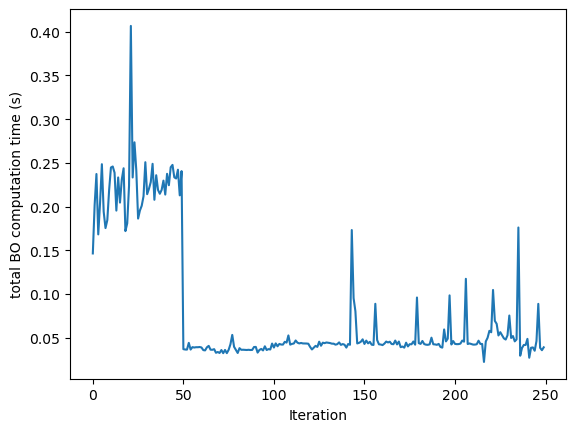

In [8]:
# plot total computation time
ax = X.generator.computation_time.sum(axis=1).plot()
ax.set_xlabel("Iteration")
ax.set_ylabel("total BO computation time (s)")

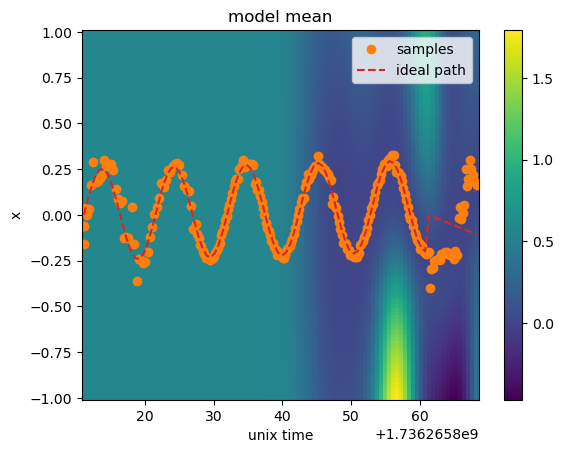

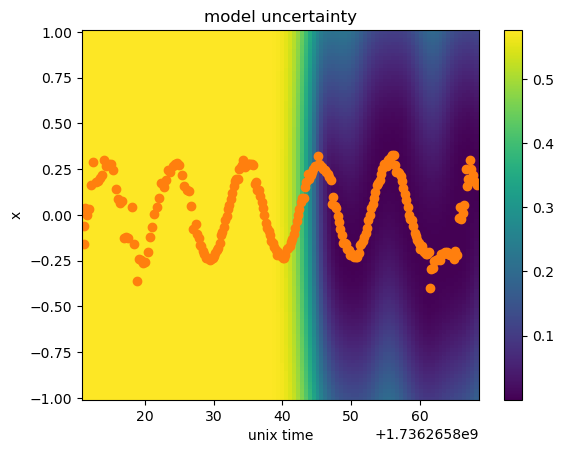

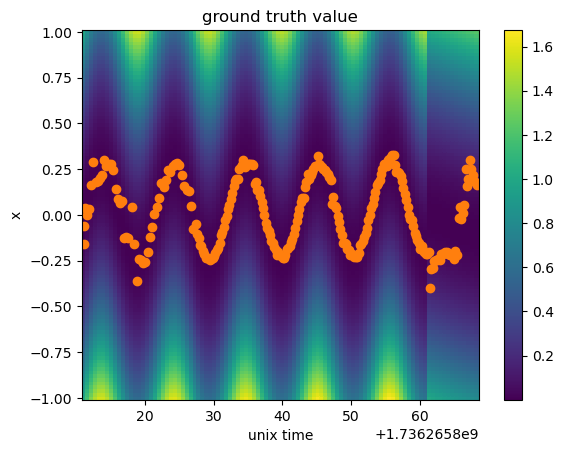

In [9]:
data = X.data

xbounds = generator.vocs.bounds
tbounds = [data["time"].min(), data["time"].max()]

model = X.generator.model
n = 100
t = torch.linspace(*tbounds, n, dtype=torch.double)
x = torch.linspace(*xbounds.flatten(), n, dtype=torch.double)
tt, xx = torch.meshgrid(t, x)
pts = torch.hstack([ele.reshape(-1, 1) for ele in (tt, xx)]).double()

tt, xx = tt.numpy(), xx.numpy()

# NOTE: the model inputs are such that t is the last dimension
gp_pts = torch.flip(pts, dims=[-1])

gt_vals = g(gp_pts.T[0], gp_pts.T[1] - start_time)

with torch.no_grad():
    post = model.posterior(gp_pts)

    mean = post.mean
    std = torch.sqrt(post.variance)

    fig, ax = plt.subplots()
    ax.set_title("model mean")
    ax.set_xlabel("unix time")
    ax.set_ylabel("x")
    c = ax.pcolor(tt, xx, mean.reshape(n, n))
    ax.plot(data["time"].to_numpy(), data["x"].to_numpy(), "oC1", label="samples")

    ax.plot(t, k(t - start_time), "C3--", label="ideal path", zorder=10)
    ax.legend()
    fig.colorbar(c)

    fig2, ax2 = plt.subplots()
    ax2.set_title("model uncertainty")
    ax2.set_xlabel("unix time")
    ax2.set_ylabel("x")
    c = ax2.pcolor(tt, xx, std.reshape(n, n))
    fig2.colorbar(c)

    fig3, ax3 = plt.subplots()
    ax3.set_title("ground truth value")
    ax3.set_xlabel("unix time")
    ax3.set_ylabel("x")
    c = ax3.pcolor(tt, xx, gt_vals.reshape(n, n))
    fig3.colorbar(c)

    ax2.plot(data["time"].to_numpy(), data["x"].to_numpy(), "oC1")
    ax3.plot(data["time"].to_numpy(), data["x"].to_numpy(), "oC1")